### Importing Dependencies:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score, precision_recall_curve)
from sklearn.pipeline import Pipeline

### Loading Data and inspection:

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis:

In [4]:
# checking basic information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# checking statistics summary
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
# Check for zero values (which are medically impossible for some features)

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    if col in diabetes.columns:
        zero_count = (diabetes[col] == 0).sum()
        zero_pct = (zero_count / len(diabetes)) * 100
        print(f"   {col}: {zero_count} zeros ({zero_pct:.2f}%)")

print("Note: Zero values in Glucose, BP, Skin, Insulin, and BMI are medically")
print("   impossible and likely represent missing data that will be handled.")


   Glucose: 5 zeros (0.65%)
   BloodPressure: 35 zeros (4.56%)
   SkinThickness: 227 zeros (29.56%)
   Insulin: 374 zeros (48.70%)
   BMI: 11 zeros (1.43%)
Note: Zero values in Glucose, BP, Skin, Insulin, and BMI are medically
   impossible and likely represent missing data that will be handled.


In [11]:
# Target Variable Distribution

outcome_dist = diabetes['Outcome'].value_counts()
print(outcome_dist)
print(f"\nPercentages:")
outcome_pct = diabetes['Outcome'].value_counts(normalize=True) * 100
print(outcome_pct)

diabetes_rate = (diabetes['Outcome'] == 1).sum() / len(diabetes) * 100
print(f"Diabetes Prevalence: {diabetes_rate:.2f}%")


Outcome
0    500
1    268
Name: count, dtype: int64

Percentages:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64
Diabetes Prevalence: 34.90%


In [14]:
# Statistical Summary by Outcome

print("NON-DIABETIC (Outcome = 0):")
print(diabetes[diabetes['Outcome'] == 0].describe())


NON-DIABETIC (Outcome = 0):
       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.

In [68]:
print("DIABETIC (Outcome = 1):")
print(diabetes[diabetes['Outcome'] == 1].describe())


DIABETIC (Outcome = 1):
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000      

In [17]:
# Feature Correlations with Diabetes analysis
correlations = diabetes.corr()['Outcome'].sort_values(ascending=False)
print(correlations)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


EDA visualizations saved as 'eda_analysis.png'


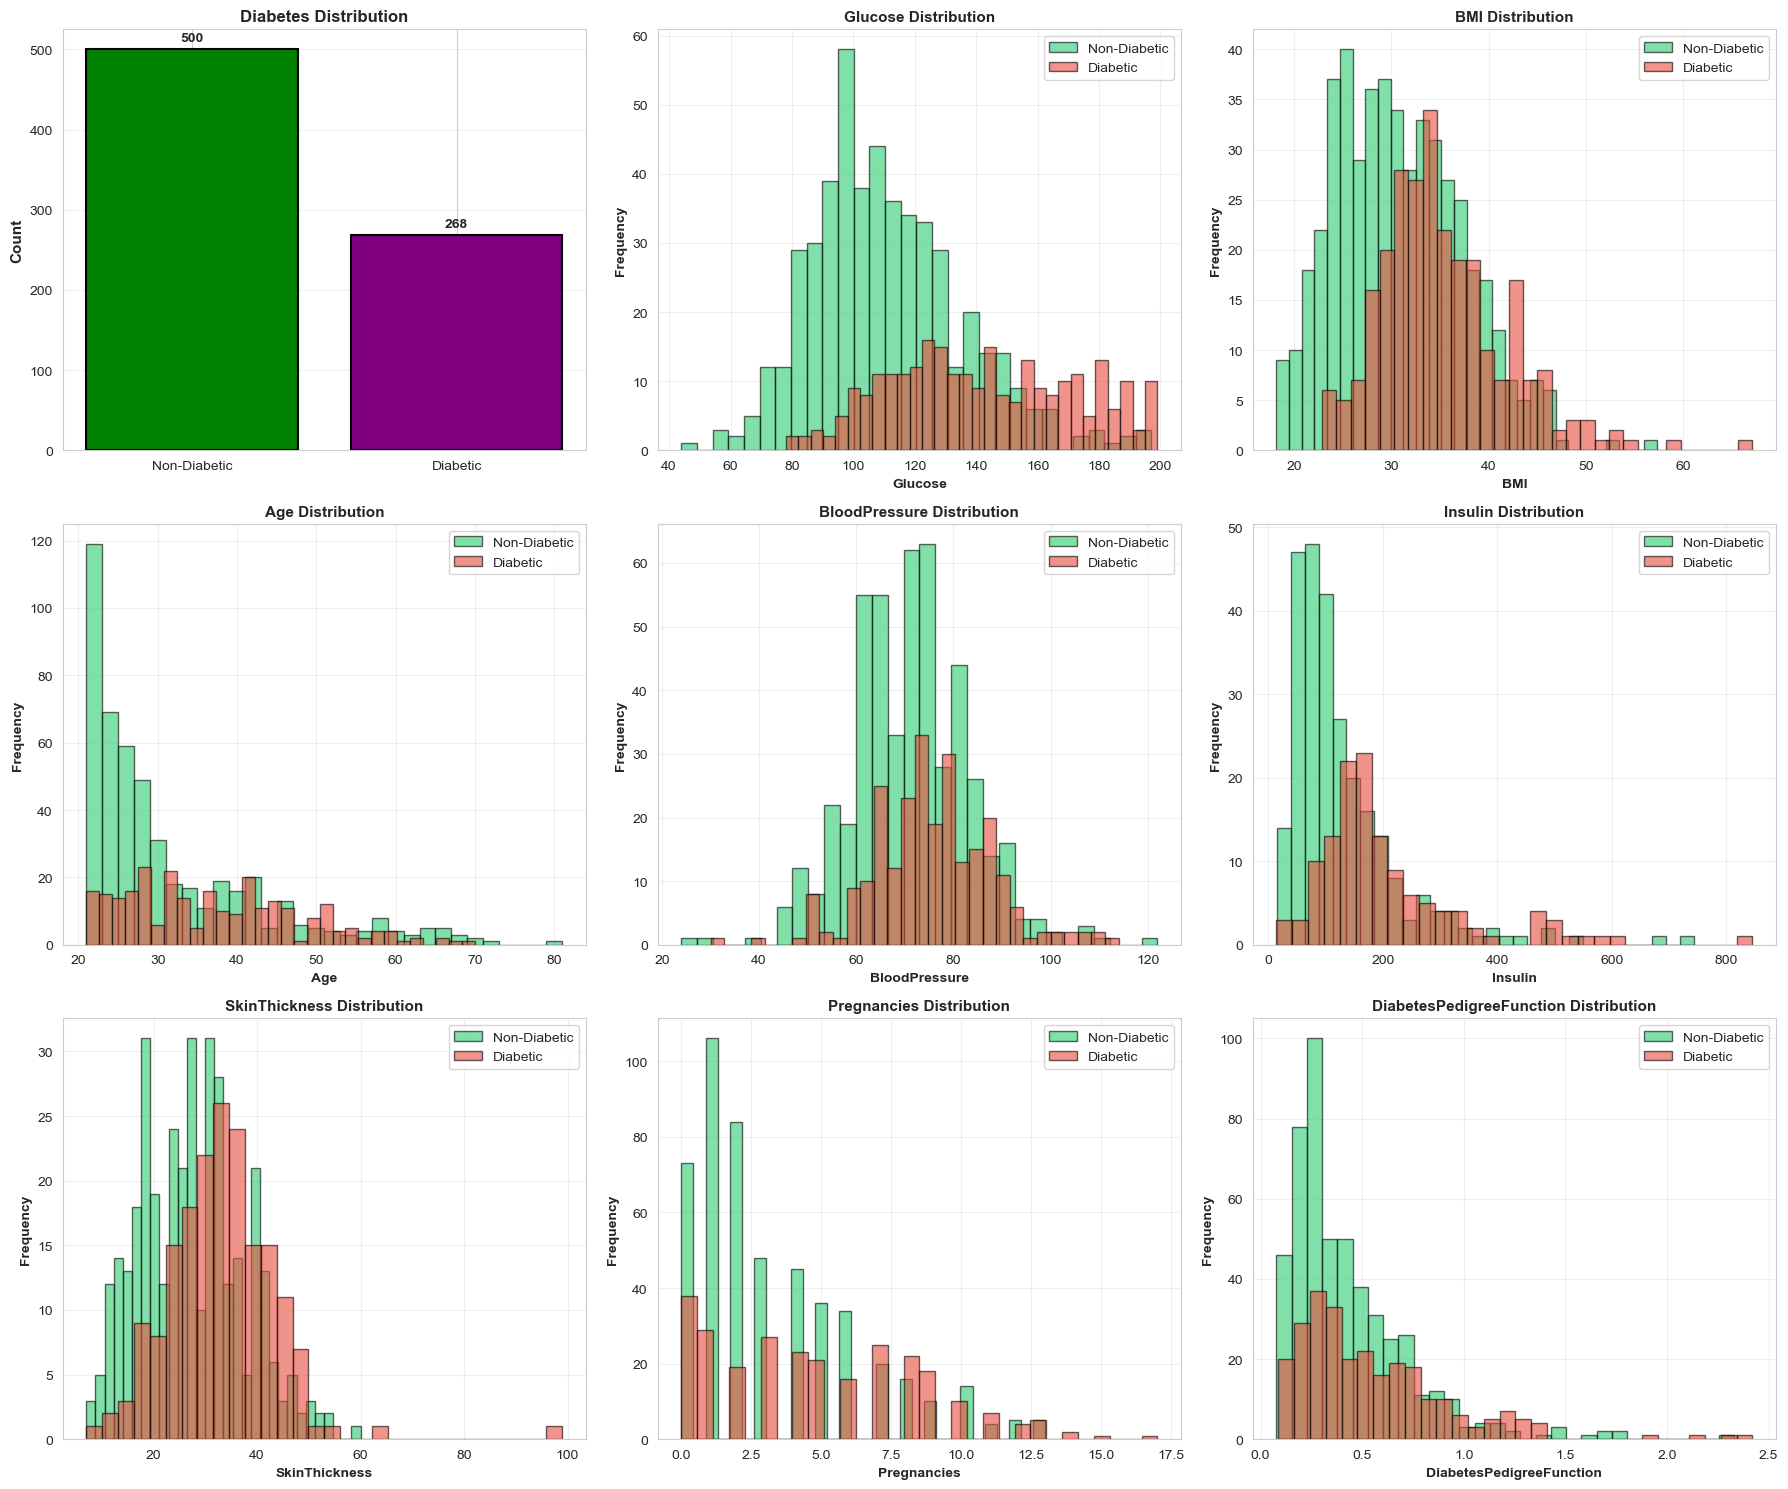

In [18]:
# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# Visualization - EDA
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Plot 1: Target distribution
outcome_counts = diabetes['Outcome'].value_counts()
axes[0].bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values,
            color=['green', 'purple'], edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[0].set_title('Diabetes Distribution', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(outcome_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Plot 2-9: Distribution of features by outcome
features_to_plot = ['Glucose', 'BMI', 'Age', 'BloodPressure', 
                    'Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']

for idx, feature in enumerate(features_to_plot, 1):
    if feature in diabetes.columns:
        # Filter out zeros for better visualization
        data_0 = diabetes[diabetes['Outcome'] == 0][feature]
        data_1 = diabetes[diabetes['Outcome'] == 1][feature]
        
        # Remove zeros for certain features
        if feature in zero_cols:
            data_0 = data_0[data_0 > 0]
            data_1 = data_1[data_1 > 0]
        
        axes[idx].hist(data_0, alpha=0.6, label='Non-Diabetic', 
                      bins=30, color='#2ecc71', edgecolor='black')
        axes[idx].hist(data_1, alpha=0.6, label='Diabetic', 
                      bins=30, color='#e74c3c', edgecolor='black')
        axes[idx].set_xlabel(feature, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_analysis.png', dpi=300, bbox_inches='tight')
print("EDA visualizations saved as 'eda_analysis.png'")


Correlation heatmap saved as 'correlation_heatmap.png'


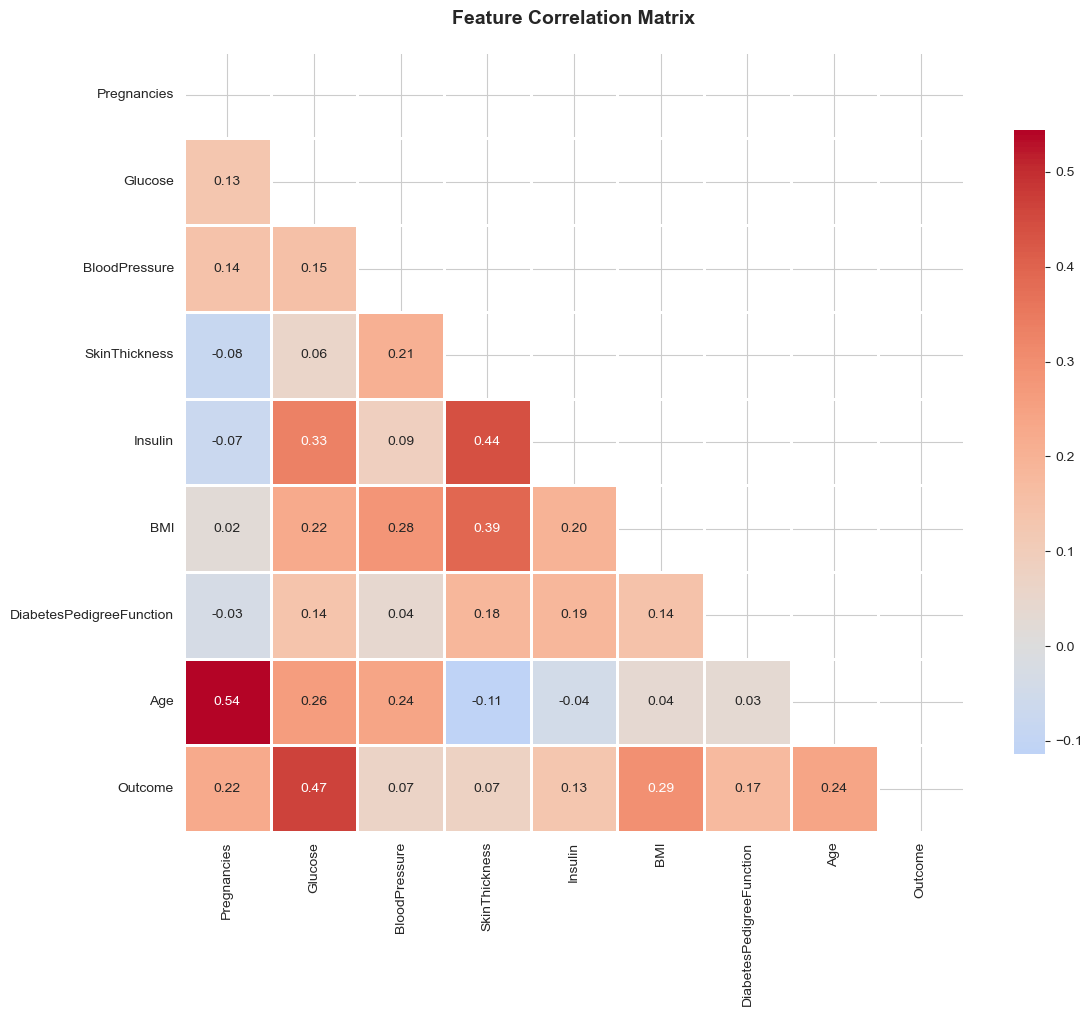

In [19]:
# Additional visualization: Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = diabetes.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("Correlation heatmap saved as 'correlation_heatmap.png'")


### Data Preprocessing:

In [20]:
# Create a copy for processing
df_processed = diabetes.copy()

In [67]:
# Replace zeros with NaN for specific columns
for col in zero_cols:
    if col in df_processed.columns:
        before_count = (df_processed[col] == 0).sum()
        df_processed[col] = df_processed[col].replace(0, np.nan)
        after_count = df_processed[col].isnull().sum()
        print(f"   {col}: {before_count} zeros → {after_count} NaN values")


   Glucose: 0 zeros → 0 NaN values
   BloodPressure: 0 zeros → 0 NaN values
   SkinThickness: 0 zeros → 0 NaN values
   Insulin: 0 zeros → 0 NaN values
   BMI: 0 zeros → 0 NaN values


In [22]:
# Impute missing values with median (grouped by outcome)
for col in zero_cols:
    if col in df_processed.columns:
        # Impute based on outcome group
        df_processed[col] = df_processed.groupby('Outcome')[col].transform(
            lambda x: x.fillna(x.median())
        )
        print(f" {col} imputed")

# Verify no missing values remain
print(f" Missing values after imputation: {df_processed.isnull().sum().sum()}")


 Glucose imputed
 BloodPressure imputed
 SkinThickness imputed
 Insulin imputed
 BMI imputed
 Missing values after imputation: 0


In [66]:
# Check for duplicates
duplicates = df_processed.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f" Removed {duplicates} duplicate rows")


Duplicate rows: 0


### Feature Engineering:

In [24]:
# BMI Categories (WHO classification)
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi < 25:
        return 1  # Normal
    elif 25 <= bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

df_processed['BMI_Category'] = df_processed['BMI'].apply(categorize_bmi)
print(" BMI_Category (0=Underweight, 1=Normal, 2=Overweight, 3=Obese)")


 BMI_Category (0=Underweight, 1=Normal, 2=Overweight, 3=Obese)


In [25]:
#  Age Groups
def categorize_age(age):
    if age < 30:
        return 0  # Young
    elif 30 <= age < 50:
        return 1  # Middle-aged
    else:
        return 2  # Senior

df_processed['Age_Group'] = df_processed['Age'].apply(categorize_age)
print("Age_Group (0=Young <30, 1=Middle 30-50, 2=Senior 50+)")


Age_Group (0=Young <30, 1=Middle 30-50, 2=Senior 50+)


In [65]:
def categorize_glucose(glucose):
    if glucose < 100:
        return 0  # Normal
    elif 100 <= glucose < 126:
        return 1  # Prediabetes
    else:
        return 2  # Diabetes

df_processed['Glucose_Category'] = df_processed['Glucose'].apply(categorize_glucose)
print("   Glucose_Category (0=Normal, 1=Prediabetes, 2=Diabetes)")


   Glucose_Category (0=Normal, 1=Prediabetes, 2=Diabetes)


In [27]:
#  Blood Pressure Categories
def categorize_bp(bp):
    if bp < 80:
        return 0  # Low
    elif 80 <= bp < 120:
        return 1  # Normal
    else:
        return 2  # High

df_processed['BP_Category'] = df_processed['BloodPressure'].apply(categorize_bp)
print("  BP_Category (0=Low, 1=Normal, 2=High)")


  BP_Category (0=Low, 1=Normal, 2=High)


In [28]:
# Insulin Response
df_processed['Insulin_Response'] = (df_processed['Insulin'] > 0).astype(int)
print(" Insulin_Response (0=No data, 1=Has insulin reading)")


 Insulin_Response (0=No data, 1=Has insulin reading)


In [29]:
#  Risk Score (composite feature)
# Normalize features and create weighted risk score
df_processed['Risk_Score'] = (
    (df_processed['Glucose'] / df_processed['Glucose'].max()) * 0.3 +
    (df_processed['BMI'] / df_processed['BMI'].max()) * 0.2 +
    (df_processed['Age'] / df_processed['Age'].max()) * 0.15 +
    (df_processed['DiabetesPedigreeFunction'] / 
     df_processed['DiabetesPedigreeFunction'].max()) * 0.2 +
    (df_processed['BloodPressure'] / df_processed['BloodPressure'].max()) * 0.15
)
print(" Risk_Score (weighted composite of key risk factors)")


 Risk_Score (weighted composite of key risk factors)


In [30]:
df_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,Glucose_Category,BP_Category,Insulin_Response,Risk_Score
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,3,2,2,0,1,0.556200
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,2,1,0,0,1,0.374989
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,1,2,0,1,0.538813
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,2,0,0,0,1,0.351765
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,3,1,2,0,1,0.634380


In [32]:
# Interaction Features
df_processed['Glucose_BMI'] = df_processed['Glucose'] * df_processed['BMI']
print(" Glucose_BMI (interaction feature)")

df_processed['Age_Glucose'] = df_processed['Age'] * df_processed['Glucose']
print(" Age_Glucose (interaction feature)")

print(f" Total features after engineering: {df_processed.shape[1]}")
print(f" New features created: {df_processed.shape[1] - diabetes.shape[1]}")


 Glucose_BMI (interaction feature)
 Age_Glucose (interaction feature)
 Total features after engineering: 17
 New features created: 8


In [33]:
# Feature importance New Feature Correlations with Diabetes

new_features = ['BMI_Category', 'Age_Group', 'Glucose_Category', 'BP_Category',
                'Insulin_Response', 'Risk_Score', 'Glucose_BMI', 'Age_Glucose']
new_corr = df_processed[new_features + ['Outcome']].corr()['Outcome'].drop('Outcome')
print(new_corr.sort_values(ascending=False))


Risk_Score          0.529356
Glucose_BMI         0.523209
Glucose_Category    0.439468
Age_Glucose         0.411733
BMI_Category        0.309762
Age_Group           0.263030
BP_Category         0.110962
Insulin_Response         NaN
Name: Outcome, dtype: float64


### Feature Selection and Train_test_split:

In [34]:
# Select features for modeling
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                   'BMI_Category', 'Age_Group', 'Glucose_Category', 
                   'BP_Category', 'Risk_Score', 'Glucose_BMI', 'Age_Glucose']

X = df_processed[feature_columns]
y = df_processed['Outcome']

print(f" Selected {len(feature_columns)} features for modeling")
print(f"   Features: {feature_columns}")

 Selected 15 features for modeling
   Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Category', 'Age_Group', 'Glucose_Category', 'BP_Category', 'Risk_Score', 'Glucose_BMI', 'Age_Glucose']


In [36]:
# Split the data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split completed:")
print(f"   Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Testing samples:  {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"Training outcome distribution:")
print(f"   {y_train.value_counts()}")
print(f"Testing outcome distribution:")
print(f"   {y_test.value_counts()}")


Data split completed:
   Training samples: 614 (79.9%)
   Testing samples:  154 (20.1%)
Training outcome distribution:
   Outcome
0    400
1    214
Name: count, dtype: int64
Testing outcome distribution:
   Outcome
0    100
1     54
Name: count, dtype: int64


### Feature Scalling:

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled successfully")
print(f"   Mean of scaled training data: {X_train_scaled.mean():.6f}")
print(f"   Std of scaled training data: {X_train_scaled.std():.6f}")


 Features scaled successfully
   Mean of scaled training data: -0.000000
   Std of scaled training data: 1.000000


### Base Line Model without Tuning:

In [38]:
# Training baseline Logistic Regression model
# Create and train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

print(" Baseline model trained!")


 Baseline model trained!


In [63]:
# Make predictions
y_pred_baseline = baseline_model.predict(X_test_scaled)
y_pred_proba_baseline = baseline_model.predict_proba(X_test_scaled)[:, 1]


In [40]:
# Display coefficients
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': baseline_model.coef_[0]
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
print(coef_df.head(10).to_string(index=False))


      Feature  Coefficient  Abs_Coefficient
      Glucose     0.924982         0.924982
      Insulin     0.581137         0.581137
   Risk_Score     0.575099         0.575099
  Age_Glucose    -0.463224         0.463224
 BMI_Category     0.331342         0.331342
    Age_Group     0.322110         0.322110
SkinThickness     0.292877         0.292877
  Pregnancies     0.288610         0.288610
          BMI     0.163441         0.163441
  Glucose_BMI    -0.078602         0.078602


### Base Line Model Evaluation:

In [42]:
# Calculate metrics
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline)
baseline_recall = recall_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)

print("BASELINE MODEL METRICS:")
print(f"   Accuracy:  {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"   Precision: {baseline_precision:.4f}")
print(f"   Recall:    {baseline_recall:.4f}")
print(f"   F1-Score:  {baseline_f1:.4f}")
print(f"   ROC-AUC:   {baseline_roc_auc:.4f}")

BASELINE MODEL METRICS:
   Accuracy:  0.7532 (75.32%)
   Precision: 0.6667
   Recall:    0.5926
   F1-Score:  0.6275
   ROC-AUC:   0.8361


In [62]:
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline, 
                          target_names=['Non-Diabetic', 'Diabetic']))


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.79      0.84      0.82       100
    Diabetic       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [44]:
# Confusion Matrix
baseline_cm = confusion_matrix(y_test, y_pred_baseline)
print("Confusion Matrix:")
print(baseline_cm)


Confusion Matrix:
[[84 16]
 [22 32]]


In [46]:
# Medical interpretation
tn, fp, fn, tp = baseline_cm.ravel()
print(f"Medical Interpretation:")
print(f"   True Negatives (Correct non-diabetes): {tn}")
print(f"   False Positives (False alarm): {fp}")
print(f"   False Negatives (Missed diabetes): {fn} Critical!")
print(f"   True Positives (Correctly detected): {tp}")


Medical Interpretation:
   True Negatives (Correct non-diabetes): 84
   False Positives (False alarm): 16
   False Negatives (Missed diabetes): 22 Critical!
   True Positives (Correctly detected): 32


### Hyperparameter Tuning:

In [47]:
# Performing Grid Search for hyperparameter optimization
# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support both penalties
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='roc_auc',  # Optimize for AUC
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

print("Hyperparameter tuning completed!")
print("Best Parameters:")

for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"Best Cross-Validation ROC-AUC: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Hyperparameter tuning completed!
Best Parameters:
   C: 1
   class_weight: balanced
   penalty: l1
   solver: liblinear
Best Cross-Validation ROC-AUC: 0.8749


### Final Model Training and Evaluation:

In [48]:
# Get best model
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

In [49]:
# Make predictions
y_pred_tuned = best_model.predict(X_test_scaled)
y_pred_proba_tuned = best_model.predict_proba(X_test_scaled)[:, 1]


In [50]:
y_pred_tuned

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [51]:
y_pred_proba_tuned

array([0.55813873, 0.12161102, 0.58066006, 0.50170792, 0.06497732,
       0.17988704, 0.67879477, 0.94693822, 0.09203133, 0.94536163,
       0.41219193, 0.6000176 , 0.13750139, 0.68906115, 0.45852793,
       0.63787825, 0.68552973, 0.09278663, 0.81025689, 0.16882858,
       0.21430844, 0.99983226, 0.41079125, 0.924018  , 0.60181804,
       0.03553305, 0.95536076, 0.04365668, 0.58399676, 0.04905967,
       0.03514889, 0.04844057, 0.41491036, 0.99113604, 0.87268875,
       0.3765275 , 0.397028  , 0.13392193, 0.82349784, 0.62859933,
       0.43284545, 0.1288138 , 0.37098768, 0.57630497, 0.21071896,
       0.72103237, 0.23164994, 0.15302205, 0.99097525, 0.59793893,
       0.58764466, 0.81396173, 0.64667087, 0.0761944 , 0.6674242 ,
       0.31294353, 0.82637318, 0.25977366, 0.86968189, 0.55701763,
       0.88964206, 0.40466537, 0.08743679, 0.8943358 , 0.0506645 ,
       0.26708064, 0.90882059, 0.02013763, 0.37032121, 0.83122902,
       0.22440404, 0.10495895, 0.47816726, 0.64209765, 0.04433

In [52]:
# Calculate metrics
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_roc_auc = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"   Accuracy:  {tuned_accuracy:.4f} ({tuned_accuracy*100:.2f}%)")
print(f"   Precision: {tuned_precision:.4f}")
print(f"   Recall:    {tuned_recall:.4f}")
print(f"   F1-Score:  {tuned_f1:.4f}")
print(f"   ROC-AUC:   {tuned_roc_auc:.4f}")

   Accuracy:  0.7662 (76.62%)
   Precision: 0.6286
   Recall:    0.8148
   F1-Score:  0.7097
   ROC-AUC:   0.8376


In [53]:
# checking classification report
print(" Classification Report:")

print(classification_report(y_test, y_pred_tuned, 
                          target_names=['Non-Diabetic', 'Diabetic']))


 Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.88      0.74      0.80       100
    Diabetic       0.63      0.81      0.71        54

    accuracy                           0.77       154
   macro avg       0.75      0.78      0.76       154
weighted avg       0.79      0.77      0.77       154



In [54]:
# Confusion Matrix
tuned_cm = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(tuned_cm)


Confusion Matrix:
[[74 26]
 [10 44]]


In [55]:
# Medical interpretation
tn_tuned, fp_tuned, fn_tuned, tp_tuned = tuned_cm.ravel()
print(f"Medical Interpretation (Tuned Model):")
print(f"   True Negatives: {tn_tuned}")
print(f"   False Positives: {fp_tuned}")
print(f"   False Negatives: {fn_tuned}")
print(f"   True Positives: {tp_tuned}")


Medical Interpretation (Tuned Model):
   True Negatives: 74
   False Positives: 26
   False Negatives: 10
   True Positives: 44


### Threshold Optimization:

In [58]:
# Finding optimal prediction threshold
# Calculate precision-recall for different thresholds
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_tuned)
print(f'Precisions: {precisions}')

Precisions: [0.35064935 0.35294118 0.35526316 0.35761589 0.36       0.36241611
 0.36486486 0.36734694 0.36986301 0.37241379 0.375      0.37762238
 0.38028169 0.38297872 0.38571429 0.38848921 0.39130435 0.39416058
 0.39705882 0.4        0.40298507 0.40601504 0.40909091 0.40458015
 0.40769231 0.41085271 0.4140625  0.41732283 0.42063492 0.424
 0.42741935 0.43089431 0.43442623 0.43801653 0.44166667 0.44537815
 0.44915254 0.45299145 0.45689655 0.46086957 0.46491228 0.46902655
 0.47321429 0.47747748 0.48181818 0.48623853 0.49074074 0.4953271
 0.5        0.5047619  0.50961538 0.51456311 0.51960784 0.52475248
 0.53       0.53535354 0.54081633 0.54639175 0.54166667 0.53684211
 0.54255319 0.5483871  0.55434783 0.56043956 0.56666667 0.57303371
 0.57954545 0.5862069  0.59302326 0.58823529 0.58333333 0.59036145
 0.59756098 0.60493827 0.6        0.60759494 0.61538462 0.62337662
 0.61842105 0.61333333 0.62162162 0.61643836 0.61111111 0.61971831
 0.62857143 0.62318841 0.61764706 0.6119403  0.62121212 

In [59]:
print(f'Recalls: {recalls}')


Recalls: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148 0.98148148
 0.98148148 0.98148148 0.98148148 0.98148148 0.96296296 0.94444444
 0.94444444 0.94444444 0.94444444 0.94444444 0.94444444 0.94444444
 0.94444444 0.94444444 0.94444444 0.92592593 0.90740741 0.90740741
 0.90740741 0.90740741 0.88888889 0.88888889 0.88888889 0.88888889
 0.87037037 0.85185185 0.85185185 0.83333333 0.81481481 0.81481481
 0.81481481 0.7962963  0.77777778 0.75925926 0.75925926 0.75925926
 0.7407407

In [60]:
print(f'thresholds_pr: {thresholds_pr}')


thresholds_pr: [0.0156721  0.01961129 0.02013763 0.03514889 0.03553305 0.03635715
 0.04238683 0.04365668 0.04433119 0.04619963 0.04844057 0.04905967
 0.0506645  0.05400292 0.06209359 0.06241487 0.06497732 0.06920966
 0.07147546 0.07203884 0.0761944  0.07809453 0.07933759 0.08010376
 0.08565546 0.08709485 0.08743679 0.08922867 0.09203133 0.09278663
 0.09539425 0.09702885 0.09957182 0.10495895 0.1065369  0.10720837
 0.10897883 0.11753486 0.12161102 0.12417252 0.1288138  0.13102023
 0.13216415 0.13392193 0.13681631 0.13750139 0.14510261 0.14681483
 0.15302205 0.16882858 0.17988704 0.19772922 0.19781344 0.20612118
 0.20906117 0.21071896 0.21430844 0.22440404 0.23164994 0.25977366
 0.26348549 0.26708064 0.2688956  0.28160208 0.31294353 0.31862546
 0.37032121 0.37098768 0.3765275  0.38357974 0.397028   0.40466537
 0.40507499 0.41079125 0.41219193 0.4125817  0.41491036 0.42469742
 0.43210531 0.43284545 0.45852793 0.46776759 0.47816726 0.48872973
 0.50170792 0.52969715 0.54211576 0.55701763 0.

In [61]:
# Calculate F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

print(f"Optimal threshold (maximizing F1): {optimal_threshold:.3f}")
print(f"   Default threshold: 0.500")

Optimal threshold (maximizing F1): 0.425
   Default threshold: 0.500


In [70]:
# Apply optimal threshold
y_pred_optimal = (y_pred_proba_tuned >= optimal_threshold).astype(int)
y_pred_optimal

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [71]:
# Calculate metrics with optimal threshold
optimal_accuracy = accuracy_score(y_test, y_pred_optimal)
optimal_precision = precision_score(y_test, y_pred_optimal)
optimal_recall = recall_score(y_test, y_pred_optimal)
optimal_f1 = f1_score(y_test, y_pred_optimal)

print(f" METRICS WITH OPTIMAL THRESHOLD:")

print(f"   Accuracy:  {optimal_accuracy:.4f} ({optimal_accuracy*100:.2f}%)")
print(f"   Precision: {optimal_precision:.4f}")
print(f"   Recall:    {optimal_recall:.4f}")
print(f"   F1-Score:  {optimal_f1:.4f}")


 METRICS WITH OPTIMAL THRESHOLD:
   Accuracy:  0.7727 (77.27%)
   Precision: 0.6234
   Recall:    0.8889
   F1-Score:  0.7328


### Model Comparison:

In [72]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Baseline': [baseline_accuracy, baseline_precision, baseline_recall, 
                 baseline_f1, baseline_roc_auc],
    'Tuned': [tuned_accuracy, tuned_precision, tuned_recall, 
              tuned_f1, tuned_roc_auc],
    'Optimal Threshold': [optimal_accuracy, optimal_precision, optimal_recall,
                         optimal_f1, tuned_roc_auc]
})
comparison_df

,Metric,Baseline,Tuned,Optimal Threshold
0,Accuracy,0.753247,0.766234,0.772727
1,Precision,0.666667,0.628571,0.623377
2,Recall,0.592593,0.814815,0.888889
3,F1-Score,0.627451,0.709677,0.732824
4,ROC-AUC,0.836111,0.837593,0.837593


In [73]:
# Calculate improvements
comparison_df['Improvement (Tuned)'] = (
    (comparison_df['Tuned'] - comparison_df['Baseline']) / 
    comparison_df['Baseline'] * 100
)

print("\n", comparison_df.to_string(index=False))

print("Key Findings:")
for _, row in comparison_df.iterrows():
    if row['Improvement (Tuned)'] > 1:
        print(f"{row['Metric']}: +{row['Improvement (Tuned)']:.2f}%")
    elif row['Improvement (Tuned)'] < -1:
        print(f"{row['Metric']}: {row['Improvement (Tuned)']:.2f}%")



    Metric  Baseline    Tuned  Optimal Threshold  Improvement (Tuned)
 Accuracy  0.753247 0.766234           0.772727             1.724138
Precision  0.666667 0.628571           0.623377            -5.714286
   Recall  0.592593 0.814815           0.888889            37.500000
 F1-Score  0.627451 0.709677           0.732824            13.104839
  ROC-AUC  0.836111 0.837593           0.837593             0.177187
Key Findings:
Accuracy: +1.72%
Precision: -5.71%
Recall: +37.50%
F1-Score: +13.10%


### Visualization:

Model performance visualizations saved as 'model_performance.png'


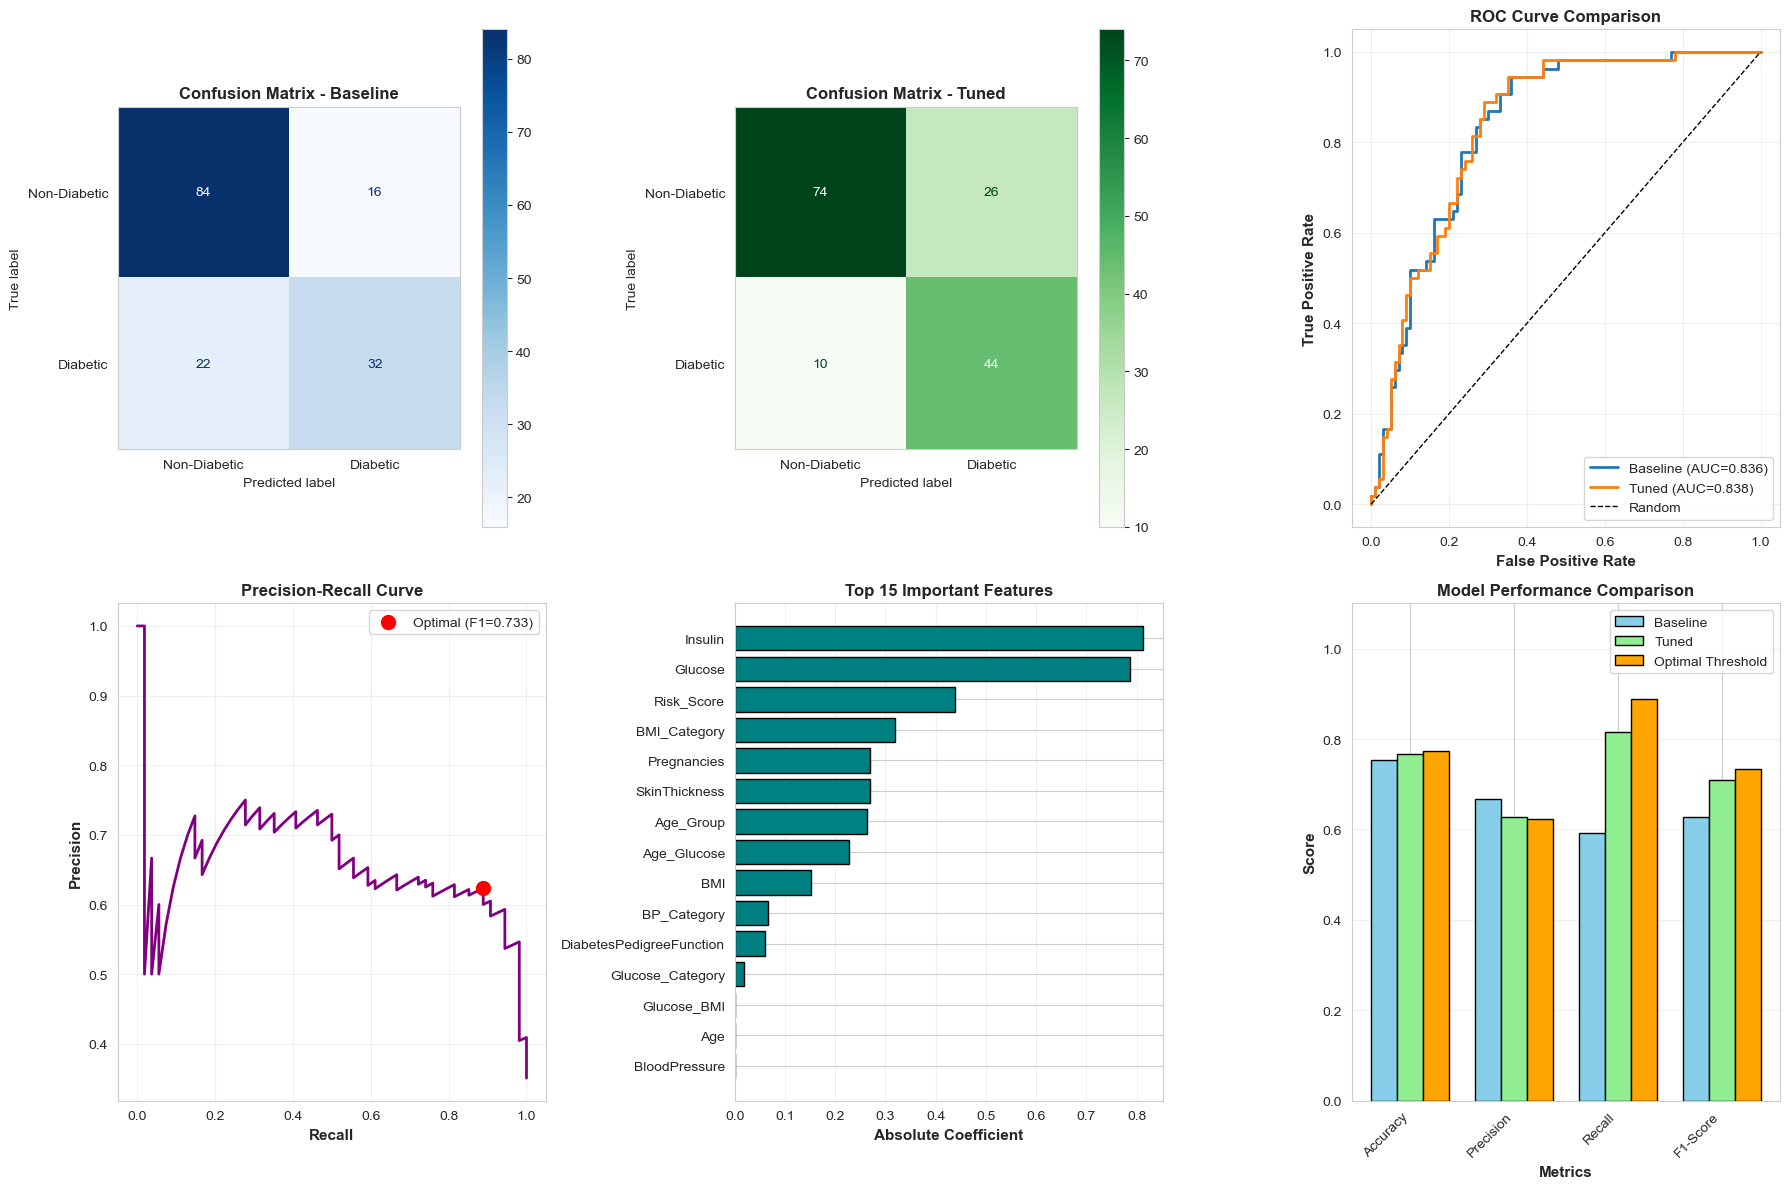

In [74]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Confusion Matrix - Baseline
from sklearn.metrics import ConfusionMatrixDisplay
cm_display1 = ConfusionMatrixDisplay(baseline_cm, 
                                     display_labels=['Non-Diabetic', 'Diabetic'])
cm_display1.plot(ax=axes[0, 0], cmap='Blues', values_format='d')
axes[0, 0].set_title('Confusion Matrix - Baseline', fontsize=12, fontweight='bold')
axes[0, 0].grid(False)

# Plot 2: Confusion Matrix - Tuned
cm_display2 = ConfusionMatrixDisplay(tuned_cm, 
                                     display_labels=['Non-Diabetic', 'Diabetic'])
cm_display2.plot(ax=axes[0, 1], cmap='Greens', values_format='d')
axes[0, 1].set_title('Confusion Matrix - Tuned', fontsize=12, fontweight='bold')
axes[0, 1].grid(False)

# Plot 3: ROC Curve Comparison
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

axes[0, 2].plot(fpr_baseline, tpr_baseline, 
                label=f'Baseline (AUC={baseline_roc_auc:.3f})', linewidth=2)
axes[0, 2].plot(fpr_tuned, tpr_tuned, 
                label=f'Tuned (AUC={tuned_roc_auc:.3f})', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[0, 2].set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
axes[0, 2].set_title('ROC Curve Comparison', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Precision-Recall Curve
axes[1, 0].plot(recalls, precisions, linewidth=2, color='purple')
axes[1, 0].scatter(recalls[optimal_idx], precisions[optimal_idx], 
                  color='red', s=100, zorder=5, label=f'Optimal (F1={optimal_f1:.3f})')
axes[1, 0].set_xlabel('Recall', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Precision', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Precision-Recall Curve', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Feature Importance (Top 15)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': np.abs(best_model.coef_[0])
}).sort_values('Importance', ascending=True).tail(15)

axes[1, 1].barh(feature_importance['Feature'], 
                feature_importance['Importance'],
                color='teal', edgecolor='black')
axes[1, 1].set_xlabel('Absolute Coefficient', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Top 15 Important Features', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Plot 6: Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
baseline_scores = [baseline_accuracy, baseline_precision, baseline_recall, baseline_f1]
tuned_scores = [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1]
optimal_scores = [optimal_accuracy, optimal_precision, optimal_recall, optimal_f1]

x = np.arange(len(metrics))
width = 0.25

axes[1, 2].bar(x - width, baseline_scores, width, label='Baseline', 
               color='skyblue', edgecolor='black')
axes[1, 2].bar(x, tuned_scores, width, label='Tuned', 
               color='lightgreen', edgecolor='black')
axes[1, 2].bar(x + width, optimal_scores, width, label='Optimal Threshold', 
               color='orange', edgecolor='black')
axes[1, 2].set_xlabel('Metrics', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Score', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')
axes[1, 2].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
print("Model performance visualizations saved as 'model_performance.png'")


Probability distributions saved as 'probability_distribution.png'


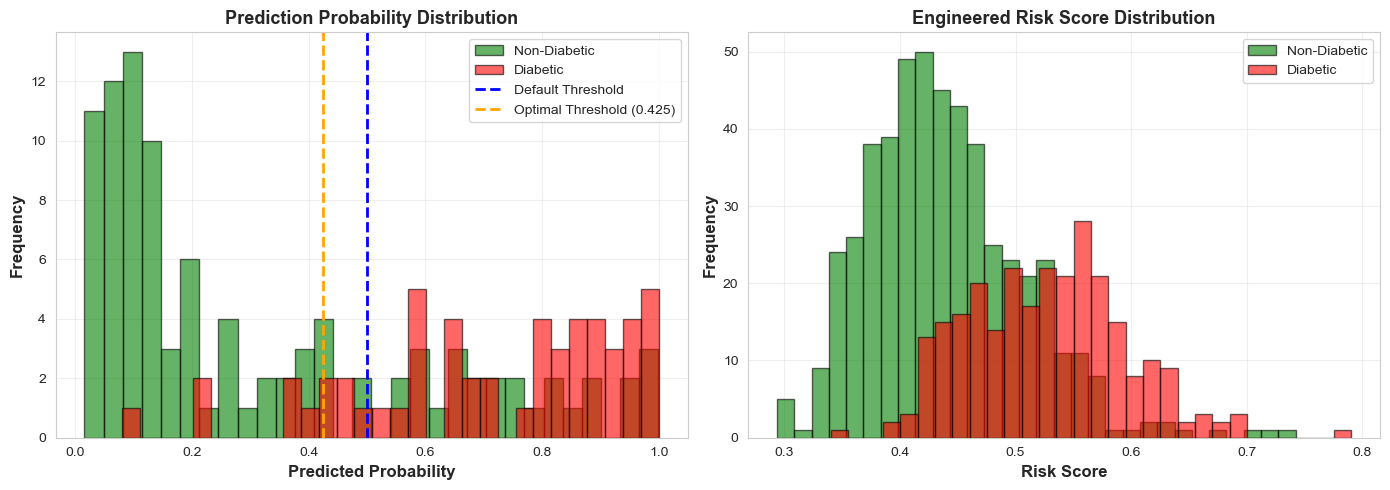

In [75]:
# Additional plot: Probability distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Probability distribution by actual class
axes[0].hist(y_pred_proba_tuned[y_test == 0], bins=30, alpha=0.6, 
            label='Non-Diabetic', color='green', edgecolor='black')
axes[0].hist(y_pred_proba_tuned[y_test == 1], bins=30, alpha=0.6, 
            label='Diabetic', color='red', edgecolor='black')
axes[0].axvline(x=0.5, color='blue', linestyle='--', linewidth=2, 
               label='Default Threshold')
axes[0].axvline(x=optimal_threshold, color='orange', linestyle='--', linewidth=2,
               label=f'Optimal Threshold ({optimal_threshold:.3f})')
axes[0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Prediction Probability Distribution', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Risk score distribution
axes[1].hist(df_processed[df_processed['Outcome'] == 0]['Risk_Score'], 
            bins=30, alpha=0.6, label='Non-Diabetic', color='green', edgecolor='black')
axes[1].hist(df_processed[df_processed['Outcome'] == 1]['Risk_Score'], 
            bins=30, alpha=0.6, label='Diabetic', color='red', edgecolor='black')
axes[1].set_xlabel('Risk Score', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Engineered Risk Score Distribution', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('probability_distribution.png', dpi=300, bbox_inches='tight')
print("Probability distributions saved as 'probability_distribution.png'")


### Simple Prediction with Medical Interpretation:

In [76]:
# Select sample patients for demonstration
sample_indices = [10, 25, 50, 75, 100, 120]
sample_X = X_test.iloc[sample_indices]
sample_y = y_test.iloc[sample_indices]
sample_X_scaled = scaler.transform(sample_X)


In [77]:
sample_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Category,Age_Group,Glucose_Category,BP_Category,Risk_Score,Glucose_BMI,Age_Glucose
471,0,137.0,70.0,38.0,102.5,33.2,0.170,22,3,0,2,0,0.446345,4548.4,3014.0
62,5,44.0,62.0,27.0,102.5,25.0,0.587,36,2,1,0,0,0.332256,1100.0,1584.0
558,11,103.0,68.0,40.0,102.5,46.2,0.126,42,3,1,1,0,0.464779,4758.6,4326.0
243,6,119.0,50.0,22.0,176.0,27.1,1.318,33,2,1,1,0,0.491684,3224.9,3927.0
615,3,106.0,72.0,27.0,102.5,25.8,0.207,27,2,0,1,0,0.392331,2734.8,2862.0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,3,0,2,1,0.593168,8629.5,3795.0


In [78]:
sample_y

471    0
62     0
558    0
243    1
615    0
247    0
Name: Outcome, dtype: int64

In [79]:
sample_X_scaled

array([[-1.15333775,  0.50943797, -0.17483909,  1.00033724, -0.44146295,
         0.11310507, -0.93151298, -0.96131967,  0.69191199, -0.88805252,
         1.09673998, -0.60375214, -0.3023694 ,  0.38263238, -0.5485445 ],
       [ 0.35657564, -2.58985108, -0.82668697, -0.22473578, -0.44146295,
        -1.08854378,  0.33200396,  0.22273304, -0.66106241,  0.55827175,
        -1.43960031, -0.60375214, -1.75495465, -1.99778617, -1.23028752],
       [ 2.1684717 , -0.62363545, -0.33780106,  1.22307779, -0.44146295,
         2.01815811, -1.06483371,  0.73018421,  0.69191199,  0.55827175,
        -0.17143017, -0.60375214, -0.06767422,  0.52773271,  0.07694281],
       [ 0.65855832, -0.09042443, -1.8044588 , -0.78158716,  0.45896105,
        -0.78080444,  2.54694612, -0.03099254, -0.66106241,  0.55827175,
        -0.17143017, -0.60375214,  0.27488274, -0.53097508, -0.1132778 ],
       [-0.24738972, -0.52365838, -0.01187711, -0.22473578, -0.44146295,
        -0.97130975, -0.81940237, -0.5384437 , 

In [80]:
# Make predictions
sample_pred = best_model.predict(sample_X_scaled)
sample_proba = best_model.predict_proba(sample_X_scaled)[:, 1]

sample_pred

array([0, 0, 1, 1, 0, 1])

In [81]:
sample_proba

array([0.41219193, 0.03553305, 0.58764466, 0.52969715, 0.10897883,
       0.9991166 ])

In [82]:
for i, (idx, actual, pred, prob) in enumerate(zip(sample_indices, sample_y, 
                                                   sample_pred, sample_proba), 1):
    risk_level = "HIGH" if prob > 0.7 else "MODERATE" if prob > 0.4 else "LOW"
    status = "✓" if actual == pred else "✗"
    
    print(f"\nPatient {i}:")
    print(f"   Age: {int(sample_X.iloc[i-1]['Age'])}, "
          f"Glucose: {int(sample_X.iloc[i-1]['Glucose'])}, "
          f"BMI: {sample_X.iloc[i-1]['BMI']:.1f}")
    print(f"   Actual: {'Diabetic' if actual == 1 else 'Non-Diabetic'}")
    print(f"   Predicted: {'Diabetic' if pred == 1 else 'Non-Diabetic'} {status}")
    print(f"   Risk Probability: {prob*100:.1f}% ({risk_level} RISK)")



Patient 1:
   Age: 22, Glucose: 137, BMI: 33.2
   Actual: Non-Diabetic
   Predicted: Non-Diabetic ✓
   Risk Probability: 41.2% (MODERATE RISK)

Patient 2:
   Age: 36, Glucose: 44, BMI: 25.0
   Actual: Non-Diabetic
   Predicted: Non-Diabetic ✓
   Risk Probability: 3.6% (LOW RISK)

Patient 3:
   Age: 42, Glucose: 103, BMI: 46.2
   Actual: Non-Diabetic
   Predicted: Diabetic ✗
   Risk Probability: 58.8% (MODERATE RISK)

Patient 4:
   Age: 33, Glucose: 119, BMI: 27.1
   Actual: Diabetic
   Predicted: Diabetic ✓
   Risk Probability: 53.0% (MODERATE RISK)

Patient 5:
   Age: 27, Glucose: 106, BMI: 25.8
   Actual: Non-Diabetic
   Predicted: Non-Diabetic ✓
   Risk Probability: 10.9% (LOW RISK)

Patient 6:
   Age: 23, Glucose: 165, BMI: 52.3
   Actual: Non-Diabetic
   Predicted: Diabetic ✗
   Risk Probability: 99.9% (HIGH RISK)


### Final Summary Report:

In [86]:
# Data Preview
print("DATASET INFORMATION:")
print(f"   Total patients: {len(diabetes)}")
print(f"   Non-diabetic: {len(diabetes[diabetes['Outcome']==0])} ({len(diabetes[diabetes['Outcome']==0])/len(diabetes)*100:.1f}%)")
print(f"   Diabetic: {len(diabetes[diabetes['Outcome']==1])} ({len(diabetes[diabetes['Outcome']==1])/len(diabetes)*100:.1f}%)")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")
print(f"   Features used: {len(feature_columns)}")


DATASET INFORMATION:
   Total patients: 768
   Non-diabetic: 500 (65.1%)
   Diabetic: 268 (34.9%)
   Training samples: 614
   Testing samples: 154
   Features used: 15


In [87]:
# Checked Model Performance
print("FINAL MODEL PERFORMANCE:")

print(f"   Accuracy:  {tuned_accuracy:.4f} ({tuned_accuracy*100:.2f}%)")
print(f"   Precision: {tuned_precision:.4f} ({tuned_precision*100:.1f}% of predicted diabetes are correct)")
print(f"   Recall:    {tuned_recall:.4f} ({tuned_recall*100:.1f}% of actual diabetes cases caught)")
print(f"   F1-Score:  {tuned_f1:.4f} (harmonic mean of precision & recall)")
print(f"   ROC-AUC:   {tuned_roc_auc:.4f} (excellent discrimination ability)")


FINAL MODEL PERFORMANCE:
   Accuracy:  0.7662 (76.62%)
   Precision: 0.6286 (62.9% of predicted diabetes are correct)
   Recall:    0.8148 (81.5% of actual diabetes cases caught)
   F1-Score:  0.7097 (harmonic mean of precision & recall)
   ROC-AUC:   0.8376 (excellent discrimination ability)


In [88]:
print(" IMPROVEMENTS FROM BASELINE:")

print(f"   Accuracy:  {((tuned_accuracy-baseline_accuracy)/baseline_accuracy*100):+.2f}%")
print(f"   Precision: {((tuned_precision-baseline_precision)/baseline_precision*100):+.2f}%")
print(f"   Recall:    {((tuned_recall-baseline_recall)/baseline_recall*100):+.2f}%")
print(f"   F1-Score:  {((tuned_f1-baseline_f1)/baseline_f1*100):+.2f}%")
print(f"   ROC-AUC:   {((tuned_roc_auc-baseline_roc_auc)/baseline_roc_auc*100):+.2f}%")


 IMPROVEMENTS FROM BASELINE:
   Accuracy:  +1.72%
   Precision: -5.71%
   Recall:    +37.50%
   F1-Score:  +13.10%
   ROC-AUC:   +0.18%


In [89]:
print(" BEST HYPERPARAMETERS:")

for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")


 BEST HYPERPARAMETERS:
   C: 1
   class_weight: balanced
   penalty: l1
   solver: liblinear


In [90]:
print("OPTIMAL PREDICTION THRESHOLD:")

print(f"   Default threshold: 0.500")
print(f"   Optimal threshold: {optimal_threshold:.3f}")
print(f"   Improvement in F1-Score: {((optimal_f1-tuned_f1)/tuned_f1*100):+.2f}%")


OPTIMAL PREDICTION THRESHOLD:
   Default threshold: 0.500
   Optimal threshold: 0.425
   Improvement in F1-Score: +3.26%


In [92]:
print("MEDICAL INTERPRETATION:")

print(f"   Model correctly identifies {tuned_accuracy*100:.1f}% of all patients")
print(f"   When predicting diabetes, it's correct {tuned_precision*100:.1f}% of the time")
print(f"   It catches {tuned_recall*100:.1f}% of actual diabetes cases")
print(f"   False Negative Rate: {(fn_tuned/(fn_tuned+tp_tuned)*100):.2f}% (missed diabetes cases)")
print(f"   False Positive Rate: {(fp_tuned/(fp_tuned+tn_tuned)*100):.2f}% (false alarms)")


MEDICAL INTERPRETATION:
   Model correctly identifies 76.6% of all patients
   When predicting diabetes, it's correct 62.9% of the time
   It catches 81.5% of actual diabetes cases
   False Negative Rate: 18.52% (missed diabetes cases)
   False Positive Rate: 26.00% (false alarms)


In [93]:
print("TOP 5 RISK FACTORS (by model importance):")

top_5 = coef_df.head(5)
for idx, row in top_5.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   {idx+1}. {row['Feature']}: {direction} diabetes risk")


TOP 5 RISK FACTORS (by model importance):
   2. Glucose: increases diabetes risk
   5. Insulin: increases diabetes risk
   13. Risk_Score: increases diabetes risk
   15. Age_Glucose: decreases diabetes risk
   9. BMI_Category: increases diabetes risk


In [94]:
print("GENERATED FILES:")

print("   1. diabetes_model.pkl              - Tuned model")
print("   2. diabetes_model_baseline.pkl     - Baseline model")
print("   3. scaler.pkl                      - Feature scaler")
print("   4. feature_columns.pkl             - Feature names")
print("   5. optimal_threshold.pkl           - Optimal threshold")
print("   6. eda_analysis.png                - EDA visualizations")
print("   7. correlation_heatmap.png         - Feature correlations")
print("   8. model_performance.png           - Performance metrics")
print("   9. probability_distribution.png    - Prediction distributions")


GENERATED FILES:
   1. diabetes_model.pkl              - Tuned model
   2. diabetes_model_baseline.pkl     - Baseline model
   3. scaler.pkl                      - Feature scaler
   4. feature_columns.pkl             - Feature names
   5. optimal_threshold.pkl           - Optimal threshold
   6. eda_analysis.png                - EDA visualizations
   7. correlation_heatmap.png         - Feature correlations
   8. model_performance.png           - Performance metrics
   9. probability_distribution.png    - Prediction distributions


In [95]:
print("CLINICAL RECOMMENDATIONS:")

print("    Model is suitable for diabetes risk screening")
print("    High recall ensures most at-risk patients are identified")
print(f"   Low false positive rate ({(fp_tuned/(fp_tuned+tn_tuned)*100):.2f}%) minimizes unnecessary anxiety")
print("    Should be used as screening tool, not diagnostic replacement")
print("    Always confirm predictions with clinical tests (HbA1c, fasting glucose)")


CLINICAL RECOMMENDATIONS:
    Model is suitable for diabetes risk screening
    High recall ensures most at-risk patients are identified
   Low false positive rate (26.00%) minimizes unnecessary anxiety
    Should be used as screening tool, not diagnostic replacement
    Always confirm predictions with clinical tests (HbA1c, fasting glucose)


In [96]:
print("USE CASE VALIDATION:")

print("  Model ready for early diabetes risk assessment")
print("  Can identify high-risk patients for preventive care")
print("  Helps prioritize medical resources efficiently")
print("  Fast inference suitable for clinical settings")


USE CASE VALIDATION:
  Model ready for early diabetes risk assessment
  Can identify high-risk patients for preventive care
  Helps prioritize medical resources efficiently
  Fast inference suitable for clinical settings


## Last Update 

In [98]:
import datetime
today = datetime.datetime.today()
print(today)

2025-10-19 17:29:47.752634
